<a href="https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationDelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface
##Learn how to learn

In the beginning, computers were invented with an aim to supplement human thinking methods, more specifically, to help us think straight through the midst of complexity. In this series of demonstrations, we provide a journey of mathematical knowledge discovery accompanied with the nurturing of computer skills by the way. In practice, the Mathematics part will include some basic counting principles and statistics, and the Computer part will be some pre-written Python codes for high school students. Through this journey, you may develop you own style of exploration via self-experiment, peer learning, web-searching, etc.

Demonstration materials in this series are by no means designed to be self-contained; but rather, we present some puzzles to guide the audience through a journey of learning. The author hoped audiences would enjoy this journey filling in the remaining details to construct their own knowledge base.

-- YK Tai

*Acknowledgement*

*The author would like to thank Bobby Poon for going through this material, giving feedback and hosting a workshop.*

#4.1 Graph Plotting

Before going into bell shaped distributions, we want to get ourselves familiar with three packages:  **Matplotlib**, **Numpy**, and **Scipy**.

For **Matplotlib**, you may want to go through **section (A)** in [the playground notebook](https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb). You may also practise some codes on recursion there.

Then, you may want to learn **Numpy** with an example in **section (B)** under [that same notebook](https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb). You are encouraged to add some printing lines to investigate some basic operations in Numpy.

After that, you may come back to play a game on graph plotting, in which we will experience the interplay of **Scipy**, **Numpy** and **Matplotlib**. (You may challenge yourself to get straight to the game if you are efficacious to pick up three packages at once.)

**4.1.1** Let's look at the graph of a *function*.

You are given a special function $F(x)$ with the following properties:

**(I).**   $F(x)$ is monotonic increasing from $0$ to $1$;

**(II).**   As $x$ tends to infinity, $F(x)$ reach the asymptotic (upper) bound $1$; 

**(III).**   As $x$ tends to negative infinity, $F(x)$ reach the asymptotic (lower) bound $0$.

You may run the following code cell for the sketch of $F(x)$. 


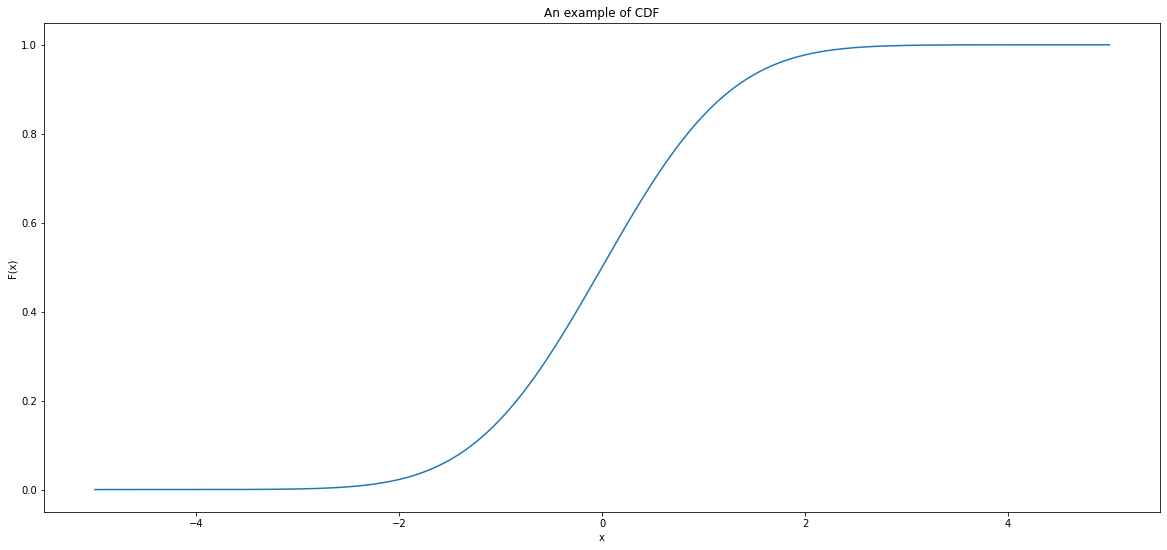

In [1]:
from scipy import special
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = (special.erf(x/np.sqrt(2))+1)/2
#print(len(x))
#print(x.shape)
#print(x[500:1000:10])
#print(y[500:1000:10])

#you may google for more settings of matplotlib
plt.rcParams["figure.figsize"] = (20,9)
plt.title("An example of CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.plot(x, y)
plt.show()


**4.1.2** Hands-on lab: Function graph transformation

Now, please insert a scratch cell to amend the code to sketch these variations of $F(x)$: 

$F(x)+1$, $2F(x)$, $F(x/2)$ and $F(x-1)$. 

1.   Could you tell what geometric transformations are these variations corresponding to?
2.   Among horizontal translation, vertical translation, scaling along $x$-axis and scaling along $y$-axis, which of them would perserve properties **(I)**, **(II)** and **(III)** as in 4.1?
3.   Composition of transformations perserving **(I)**, **(II)** and **(III)** should also perserves these properties. Could you plot some possible composition?

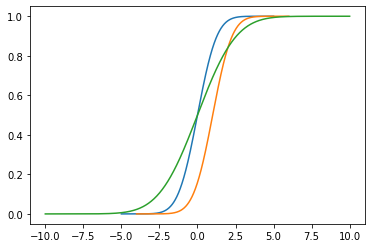

In [2]:
#@title Hints for 4.1.2 Hands on lab.
#@markdown Show code for hints. Comment some lines and run the cell to see which graph correspond to which function
plt.plot(x, y)   # F(x)
plt.plot(x+1, y) # F(x-1)
plt.plot(x*2, y) # F(x/2)
#plt.plot(x, y+1) # F(x)+1
#plt.plot(x, y*2) # 2F(x)
plt.show()

#4.2 Normal Distribution

**4.2.1** So where is ther bell shaped distribution?

Theoretically, functions satisfying **(I)**, **(II)** and **(III)** are *Cumulative Distribution Functions (CDFs)* of certain distributions. 

Take our case in 4.1.1 as an example, its function value $F(x)$ indicate the probability (a measure ranges from $0$ to $1$) of an underlying random variable $X$ being less than or equal to $x$ (i.e. $F(X)=P(x\leq X)$).

If a CDF is smooth, we may record its slope with the probability density function (pdf).

In particular, the CDF $F(x)$ in 4.1.1 is smooth and its corresponding pdf can be plotted in the code cell below, a very standard bell shaped distribution!!! 

Indeed, it is known as [the standard normal distribution](https://mathworld.wolfram.com/StandardNormalDistribution.html)~

We shall justify in the next notebook DemonstrationEpislon how *normal* this distribution is.

[Remark: If a CDF is a step function, we may record its steps with the probability mass function (pmf).]

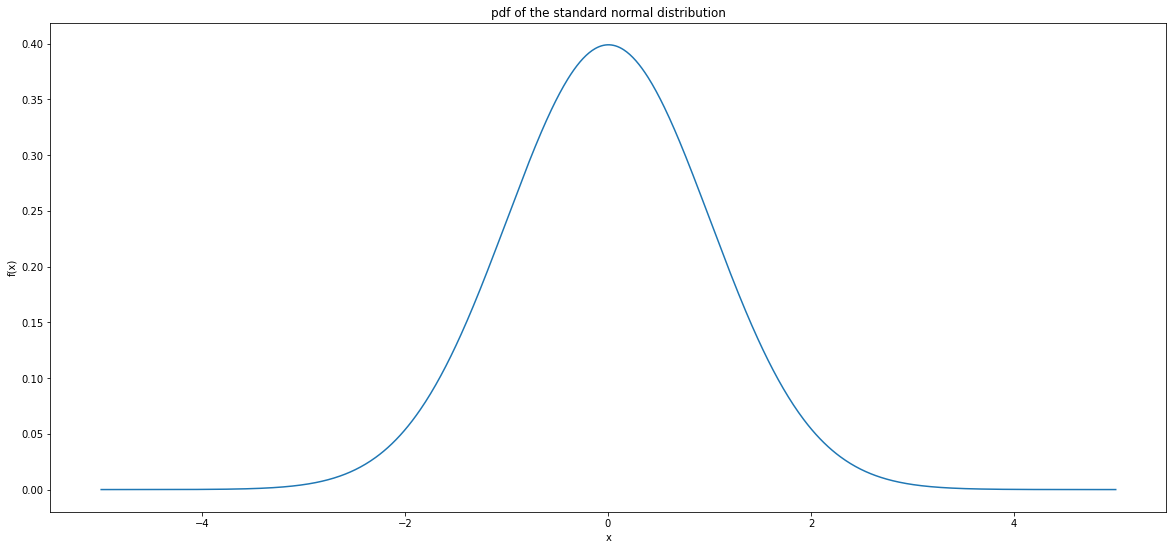

In [3]:
x = np.linspace(-5, 5, 1000)
F = (special.erf(x/np.sqrt(2))+1)/2

#compute slope by taking numerical derivative
def d(y, dx):
  return np.diff(y)/dx

f = d(F, x[1]-x[0]) 

plt.rcParams["figure.figsize"] = (20,9)
plt.title("pdf of the standard normal distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x[1:], f)
plt.show()

**4.2.2** Are there more bell shaped distributions?

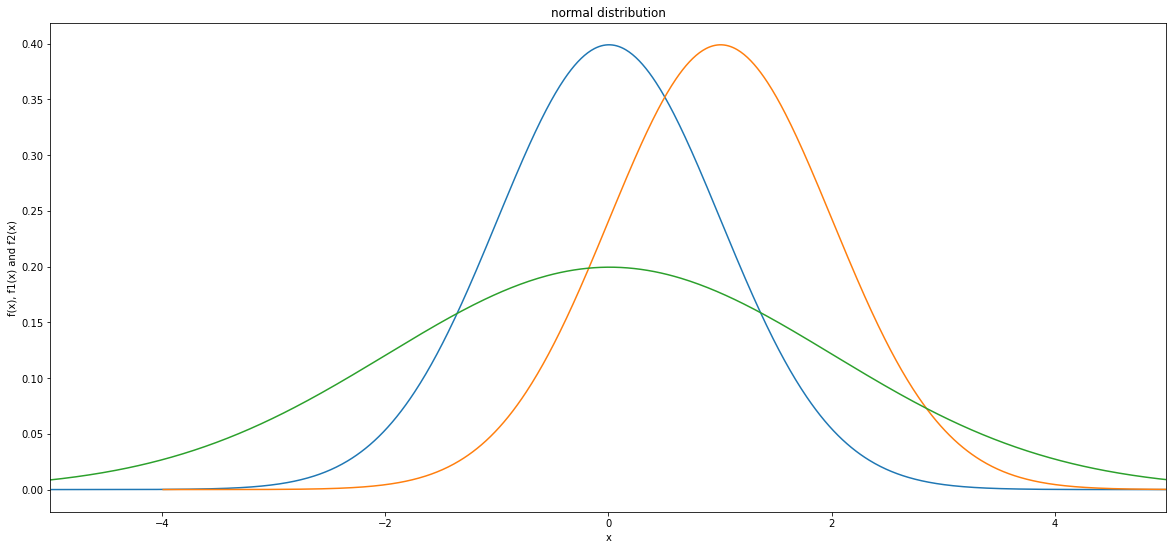

In [4]:
#@title Sure thing.

#@markdown Remember the translation and scaling along x-axis in 4.1.2?

#@markdown So long as transforms perserve properties (I), (II) and (III), they could be use to transform one CDF to another.

#@markdown We could actually use horizontal translation and scaling to transform CDF of the standard normal distribution to CDF of normal distribution in other positions.

#@markdown Now, taking slope of the transformed CDF of a normal distribution gives rise to pdf of normal distribution in other position. And we have bell shaped distribution again!

#@markdown Audience interested in coding may check the code and write composition of the two types of transformation for more general positions.

plt.rcParams["figure.figsize"] = (20,9)
plt.title("normal distribution")
plt.xlabel("x")
plt.ylabel("f(x), f1(x) and f2(x)")
plt.xlim((-5,5))

f = d(F, x[1]-x[0])
plt.plot(x[1:], f)

x1 = x+1
f1 = d(F, x1[1]-x1[0])
plt.plot(x1[1:], f1)

x2 = x*2
f2 = d(F, x2[1]-x2[0])
plt.plot(x2[1:], f2)

plt.show()

**4.2.3** Hands on lab: First two moments

*Special thanks to Harold Chao for some helpful discussion in this section*

The first moment of a distribution is just the *mean* of a distribution. Change of the first moment correspond to translation of the corresponding pdf (and also the underlying CDF).

The second central moment of a distibution is also known as the *variance*, the square of the *standard deviation*. The second central moment bookkeeped how the distribution would spread over. (For the underlying CDF, change of the second order momnet correspond to scaling along the x-axis with the mean as the central position.)

In the code cells, you may use the slider to specify the mean and variance of the normal distribution and plot it by clicking "run" button :)


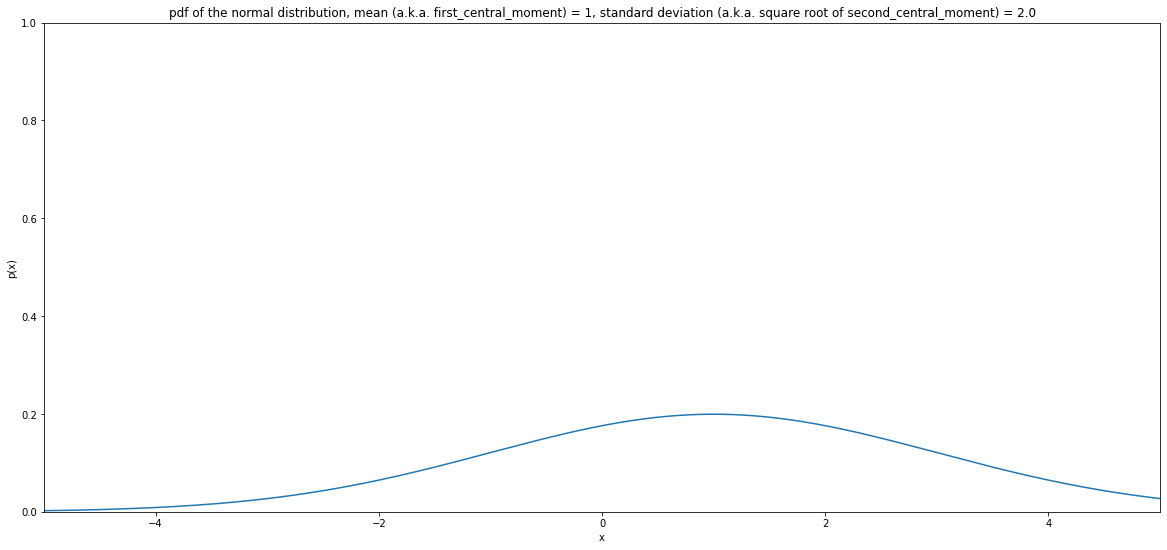

In [15]:
#@title Select values of the mean and the standard deviation with the sliders and run the result

first_moment = 1#@param{type:"slider", max:3, min:-3, step:"0.0001"}
second_central_moment = 4#@param{type:"slider", max:5, min:0, step:"0.0001"}

def normal(xs = np.linspace(-100,100,10000),mean = 0,sigma = 0):
  return np.exp(-((xs-mean)/sigma)**2/2)/sigma/(np.sqrt(2*np.pi))

x = np.linspace(-100,100,10000)
mu = first_moment
sigma = np.sqrt(second_central_moment)
p = normal(x, mu, sigma)

plt.rcParams["figure.figsize"] = (20,9)
plt.xlim((-5,5))
plt.ylim((0,1))
plt.title("pdf of the normal distribution, mean (a.k.a. first_central_moment) = {}, standard deviation (a.k.a. square root of second_central_moment) = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("p(x)")
plt.plot(x, p)
plt.show()


*More Hands-on:*

Workshop host would need to help with some terminology here.

Let $X$ be a random variable with pdf specified normal(xs, mu, sigma), you may attempt the following:
1.  Write your own code to compute $\mu = E[X]$
2.  Write your own code to compute $\sigma = \sqrt{E[(X-\mu)^2]}$
3.  Try to rewrite the plotting code of normal(xs, mu, sigma) by taking slopes of some transformation of the erf function.


In [42]:
"""
mean = np.dot(p, x)*(x[1]-x[0])
print(mean)
varience = np.dot(p, (x-mean)**2)*(x[1]-x[0])
sd = np.sqrt(varience)
print(varience)
print(sd)

def plotNormal(xs, mu, sigma):
  Lx = (xs-mu)/sigma
  F = (special.erf(Lx/np.sqrt(2))+1)/2
  dx = x[1]-x[0]
  p = np.diff(F)/dx
  plt.rcParams["figure.figsize"] = (20,9)
  plt.xlim((-5,5))
  plt.ylim((0,1))
  plt.title("(xs-mu)/sigma is the standard nomral distribution")
  plt.xlabel("xs")
  plt.ylabel("p(x)")
  plt.plot(xs[1:], p)
  plt.show()

plotNormal(xs = np.linspace(-100, 100, 10000), mu = 1, sigma = 2)
"""

#Next Episode: Binomial Distribution (coming soon)

Does the above has anything to do with the combinatorics we see in previous demonstration? Yes, sure. We will go back to binomial distribution and see how it is related to the normal distribution next time.